Steps for building the classification model
1. Gathering and loading data
2. Data cleaning
3. Data visualization
4. Data preparation & transformation
5. Model training
6. Model evaluation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
#import the data
df=pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
#check data balance
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [5]:
df['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [6]:
#check missing values and outliers
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [7]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


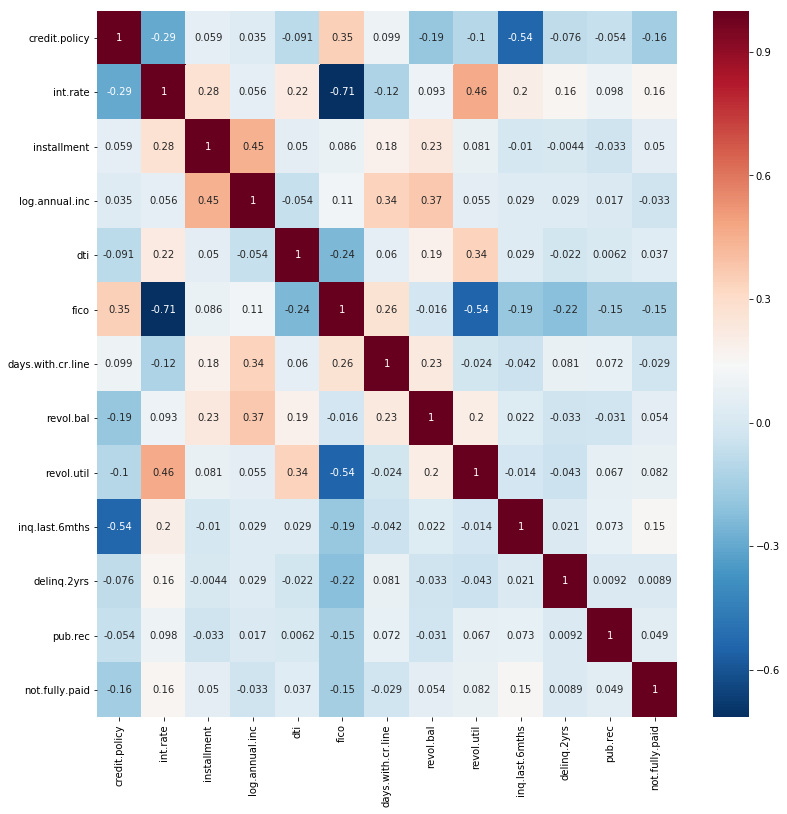

In [8]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True)

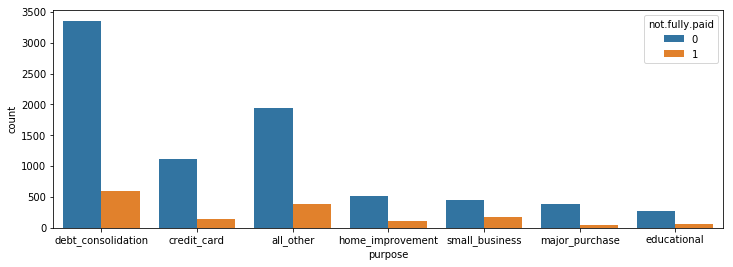

In [9]:
plt.figure(figsize=(12,4))
sns.countplot(x='purpose',hue='not.fully.paid',data=df)

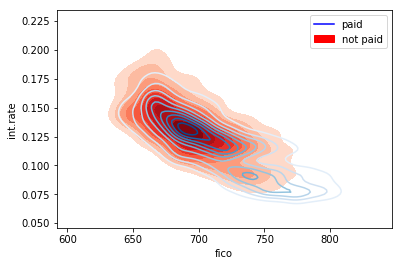

In [10]:
# Subset the iris dataset by species
notpaid = df[df['not.fully.paid'] == 1]
paid =  df[df['not.fully.paid'] == 0]


# Draw the two density plots
ax = sns.kdeplot(notpaid.fico, notpaid['int.rate'],
                 cmap="Reds", shade=True, shade_lowest=False, color="r", label='not paid')
ax = sns.kdeplot(paid.fico,  paid['int.rate'],
                 cmap="Blues", shade=False, shade_lowest=False, color="b", label='paid')

ax.legend(loc='upper right')

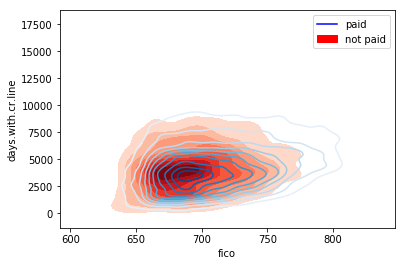

In [11]:
# Subset the iris dataset by species
notpaid = df[df['not.fully.paid'] == 1]
paid =  df[df['not.fully.paid'] == 0]

# Draw the two density plots
ax = sns.kdeplot(notpaid.fico, notpaid['days.with.cr.line'],
                 cmap="Reds", shade=True, shade_lowest=False, color="r", label='not paid')
ax = sns.kdeplot(paid.fico,  paid['days.with.cr.line'],
                 cmap="Blues", shade=False, shade_lowest=False, color="b", label='paid')

ax.legend(loc='upper right')

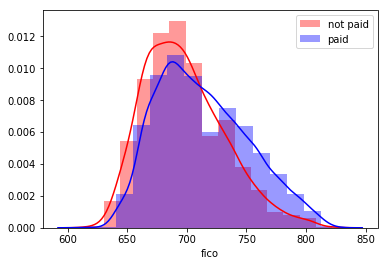

In [12]:
# Subset the iris dataset by species
notpaid = df[df['not.fully.paid'] == 1]
paid =  df[df['not.fully.paid'] == 0]

# Draw the two density plots
ax = sns.distplot(notpaid.fico, bins=15, color="r", label='not paid')
ax = sns.distplot(paid.fico, bins=15, color="b", label='paid')

ax.legend(loc='upper right')

# split dataset into train and validation sets

In [13]:
#split dataset into train and validation sets
x=df.drop('not.fully.paid',axis=1)
y=df['not.fully.paid']
x_train_df, x_valid_df, y_train, y_valid = train_test_split(x,y,test_size=0.30,random_state=29)

In [14]:
#deal with class imbalance
x_train_df = x_train_df[y_train==0].iloc[0:1074].append(x_train_df[y_train==1])
y_train = y_train[y_train==0].iloc[0:1074].append(y_train[y_train==1])

In [15]:
from sklearn.utils import shuffle
x_train_df, y_train = shuffle(x_train_df, y_train, random_state=0)

In [16]:
#reset indexes to start from zero
x_train_df.reset_index(inplace=True, drop=True)
x_valid_df.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_valid.reset_index(inplace=True, drop=True)

# Data preparation & transformation

In [17]:
new_df = x_train_df.copy()
#convert categorial data to One Hot Encoding 
new_df =pd.get_dummies(new_df,columns=['purpose'])

#Standardize non-cat features by removing the mean and scaling to unit variance
cols=['int.rate', 'installment', 'log.annual.inc','dti', 'fico', 'days.with.cr.line',
      'revol.bal', 'revol.util','inq.last.6mths', 'delinq.2yrs', 'pub.rec']
scaler=StandardScaler()
tr_cols= scaler.fit_transform(new_df[cols])
new_df[cols] = tr_cols

F:\MLProjects\envconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
F:\MLProjects\envconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [18]:
#transform valid data to prevent leaks from valid to training
new_df_valid = x_valid_df.copy()
#convert categorial data to One Hot Encoding 
new_df_valid =pd.get_dummies(new_df_valid,columns=['purpose'])

#scaler:  use the scaler from training part
tr_cols= scaler.transform(new_df_valid[cols])
new_df_valid[cols] = tr_cols

F:\MLProjects\envconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


# Training

In [19]:
#defining the classificaation algorithm
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(new_df,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
#evaluate the model
predicts=clf.predict(new_df_valid)

In [21]:
print(classification_report(y_valid, predicts))
print(confusion_matrix(y_valid,predicts))

              precision    recall  f1-score   support

           0       0.87      0.57      0.69      2415
           1       0.19      0.54      0.28       459

   micro avg       0.56      0.56      0.56      2874
   macro avg       0.53      0.55      0.48      2874
weighted avg       0.76      0.56      0.62      2874

[[1376 1039]
 [ 213  246]]


#Random Forest Model training

In [22]:
#Random Forest Model training
from sklearn.ensemble import RandomForestClassifier
rfcModel=RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=4,
            oob_score=False, random_state=32, verbose=0,
            warm_start=False)

rfcModel.fit(new_df,y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=4,
            oob_score=False, random_state=32, verbose=0, warm_start=False)

In [23]:
#Evaluation of random forest
predictions=rfcModel.predict(new_df_valid)
print(classification_report(y_valid, predicts))
print(confusion_matrix(y_valid,predicts))

              precision    recall  f1-score   support

           0       0.87      0.57      0.69      2415
           1       0.19      0.54      0.28       459

   micro avg       0.56      0.56      0.56      2874
   macro avg       0.53      0.55      0.48      2874
weighted avg       0.76      0.56      0.62      2874

[[1376 1039]
 [ 213  246]]


# LightGBM

In [24]:
import lightgbm
# create dataset for lightgbm
#lgb_train = lightgbm.Dataset(new_df,y_train)
#lgb_eval = lightgbm.Dataset(new_df_valid, y_valid, reference=lgb_train)

In [25]:
lgbm_params = {'objective': 'binary',
               'metric': ['binary_logloss', 'auc'],
               'learning_rate' : 0.02,
               'num_leaves' : 76,
               'feature_fraction': 0.64, 
               'bagging_fraction': 0.8, 
              'bagging_freq':1,
               'boosting_type' : 'gbdt',
               'verbose': 0,
               "nthread": 4,
               "random_state": 25}




# Construct a gradient boosting model
gbm_model = lightgbm.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, 
                                    learning_rate=0.01, n_estimators=400, subsample_for_bin=200000,
                                    objective= 'binary', class_weight=None, min_split_gain=0.0,
                                    min_child_weight=0.001, min_child_samples=20, subsample=1.0,
                                    subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0,
                                    reg_lambda=0.0, random_state=26, n_jobs=-1,
                                    silent=False, importance_type='split')

gbm_model.fit(new_df,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.01, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=400, n_jobs=-1, num_leaves=31, objective='binary',
        random_state=26, reg_alpha=0.0, reg_lambda=0.0, silent=False,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [26]:
predicts_prb = gbm_model.predict(new_df_valid)
predicts = np.round(predicts_prb)

In [27]:
print(classification_report(y_valid, predicts))
print(confusion_matrix(y_valid,predicts))

              precision    recall  f1-score   support

           0       0.89      0.58      0.70      2415
           1       0.22      0.61      0.32       459

   micro avg       0.59      0.59      0.59      2874
   macro avg       0.55      0.60      0.51      2874
weighted avg       0.78      0.59      0.64      2874

[[1412 1003]
 [ 180  279]]


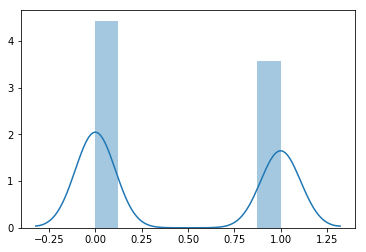

In [28]:
sns.distplot(predicts)

# using Grid-search to tune the hyperparameters to their opimal values

In [29]:
#because not giving the loan to risky customers is much more important than to give loan
#to normal customers, our goal is to reduce the False Negatives,or increaseing the recall for class 1

In [30]:
from sklearn.model_selection import GridSearchCV
# Construct a gradient boosting model
gbm_model = lightgbm.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, 
                                    learning_rate=0.01, n_estimators=400, subsample_for_bin=200000,
                                    objective= 'binary', class_weight=None, min_split_gain=0.0,
                                    min_child_weight=0.001, min_child_samples=20, subsample=1.0,
                                    subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0,
                                    reg_lambda=0.0, random_state=26, n_jobs=-1,
                                    silent=False, importance_type='split')


#define Grid-search parameters
gridParams = {
    'objective': ['binary'],
    'num_leaves': [20,10],
    'max_depth':[-1], 
    'learning_rate':[0.05],
    'n_estimators':[100],
    'subsample':[1.0,0.7,0.6],
    'colsample_bytree':[0.7,0.6],
    'reg_alpha':[1.2,1.1],
    'reg_lambda':[0.0]
}


scoring = ['recall','precision','f1_macro','roc_auc']
gridGBM = GridSearchCV(gbm_model,
                       param_grid = gridParams,
                       cv=5, 
                       refit='roc_auc', #Refit an estimator using the best found parameters on the whole dataset.
                       n_jobs=-1,
                       scoring = scoring)

gridGBM.fit(new_df,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.01, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=400, n_jobs=-1, num_leaves=31, objective='binary',
        random_state=26, reg_alpha=0.0, reg_lambda=0.0, silent=False,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'objective': ['binary'], 'num_leaves': [20, 10], 'max_depth': [-1], 'learning_rate': [0.05], 'n_estimators': [100], 'subsample': [1.0, 0.7, 0.6], 'colsample_bytree': [0.7, 0.6], 'reg_alpha': [1.2, 1.1], 'reg_lambda': [0.0]},
       pre_dispatch='2*n_jobs', refit='roc_auc', return_train_score='warn',
       scoring=['recall', 'precision', 'f1_macro', 'roc_auc'], verbose=0)

In [31]:
predicts_prob = gridGBM.predict_proba(new_df_valid)
#predicts = gridGBM.predict(new_df_valid)

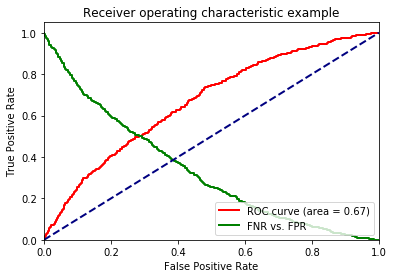

In [34]:
from sklearn.metrics import roc_curve,auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_valid,predicts_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr, 1-tpr, color='green',
         lw=lw, label='FNR vs. FPR')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [42]:
predicts = np.round(predicts_prob[:,1]>0.15)  #threshold selection (compromise between FNR and FPR)
print(classification_report(y_valid, predicts))
print(confusion_matrix(y_valid,predicts))

              precision    recall  f1-score   support

           0       0.97      0.06      0.11      2415
           1       0.17      0.99      0.29       459

   micro avg       0.21      0.21      0.21      2874
   macro avg       0.57      0.52      0.20      2874
weighted avg       0.84      0.21      0.14      2874

[[ 144 2271]
 [   5  454]]


In [38]:
res=pd.DataFrame(gridGBM.cv_results_)
#res.sort_values(by=['rank_test_score']).head()

In [39]:
res[res['rank_test_recall']==1].T

,18,19,20
mean_fit_time,0.179727,0.18353,0.177326
std_fit_time,0.00338452,0.00712094,0.00495821
mean_score_time,0.0934669,0.0988705,0.094668
std_score_time,0.00257823,0.00926736,0.00205992
param_colsample_bytree,0.6,0.6,0.6
param_learning_rate,0.05,0.05,0.05
param_max_depth,-1,-1,-1
param_n_estimators,100,100,100
param_num_leaves,10,10,10
param_objective,binary,binary,binary
